In [149]:
from si import *

In [170]:
# db2 = "./data/run3.db"
# db3 = "./data/processing.db"

db2 ="./data/run3_run34921_00100_nearline2.db"
# db2 ="./data/run4_run34921_00100_container.db" # container with v9_44 islandtemplatefitter
# db3 ="./data/run4_run34921_00100_container.db"
# db3 ="./data/run4_run34921_00100_nearline2.db"
db3 ="./data/run4_run34921_00100_nearline2_revertIslandTemplateFit.db"
# db3 ="./data/run4_run34921_00100_container_originalFitter.db" # container with the v9_30 fitter
titles =  ("v9_30","v9_44")

In [171]:
import sqlite3
conn2 = sqlite3.connect(db2)
conn3 = sqlite3.connect(db3)

In [172]:
sources = []
events = []
modules = []

for conn in [conn2, conn3]:
    c = conn.cursor()
    c.execute("SELECT name FROM sqlite_master WHERE type='table';")
    print(c.fetchall())
    TimeSource = pandas.read_sql_query("SELECT * from TimeSource", conn)
    sources.append(TimeSource)
    TimeEvent = pandas.read_sql_query("SELECT * from TimeEvent", conn)
    events.append(TimeEvent)
    TimeModule = pandas.read_sql_query("SELECT * from TimeModule", conn)
    modules.append(TimeModule)

[('TimeSource',), ('TimeEvent',), ('TimeModule',)]
[('TimeSource',), ('TimeEvent',), ('TimeModule',)]


In [173]:
print([type(x) for x in sources])

[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>]


In [174]:
sources[0].head()

,Run,SubRun,Event,Source,Time
0,34921,100,1,MidasBankInput,0.000022
1,34921,100,2,MidasBankInput,0.000002
2,34921,100,3,MidasBankInput,0.000002
3,34921,100,4,MidasBankInput,0.000002
4,34921,100,5,MidasBankInput,0.000002


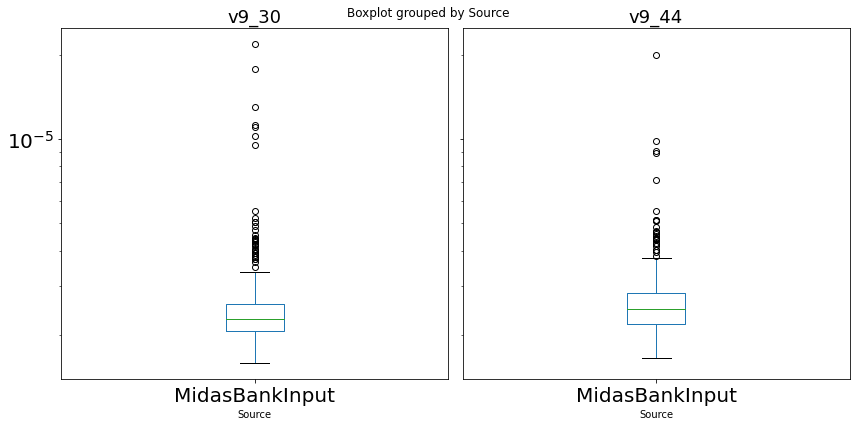

In [175]:
fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True)

for i in range(len(ax)):
    sources[i].boxplot(column='Time', by='Source', ax=ax[i])

# sns.boxplot(x="Source", y="Time", data=sources[0], ax = ax[0])
# sns.boxplot(x="Source", y="Time", data=sources[1], ax = ax[1])

for axi, title in zip(ax, titles):
    axi.set_title(title,size=18)
    axi.set_yscale("log")
    axi.grid()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

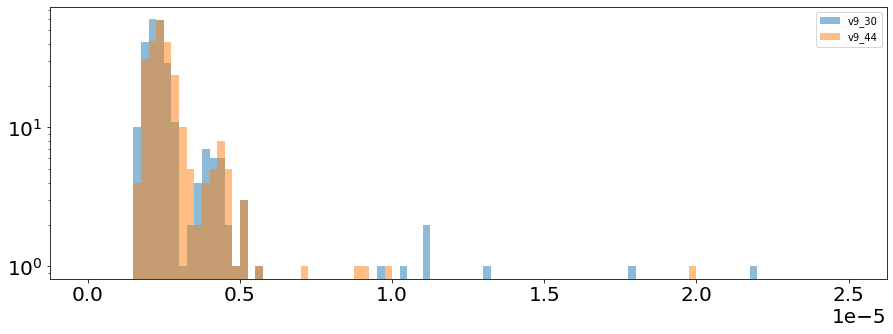

In [176]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(sources):
    plt.hist(ei['Time'], bins=100, range=(0,0.000025), alpha=0.5, label=titles[i])
plt.yscale('log')
plt.legend()
plt.show()

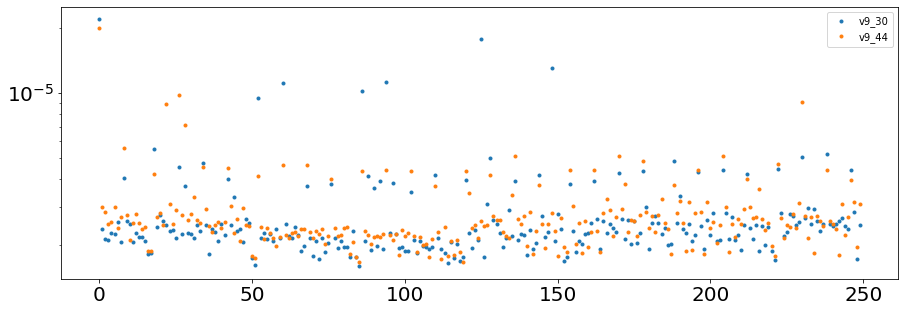

In [177]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(sources):
    plt.plot(ei['Time'], ".", label=titles[i])
plt.yscale('log')
plt.legend()
plt.show()

---

In [178]:
events[0].describe()

,Run,SubRun,Event,Time
count,250.0,250.0,250.000000,250.000000
mean,34921.0,100.0,125.500000,0.071357
std,0.0,0.0,72.312977,0.085721
min,34921.0,100.0,1.000000,0.001545
25%,34921.0,100.0,63.250000,0.003125
50%,34921.0,100.0,125.500000,0.003425
75%,34921.0,100.0,187.750000,0.165282
max,34921.0,100.0,250.000000,0.383018


In [179]:
events[1].describe()

,Run,SubRun,Event,Time
count,250.0,250.0,250.000000,250.000000
mean,34921.0,100.0,125.500000,0.070365
std,0.0,0.0,72.312977,0.084791
min,34921.0,100.0,1.000000,0.001577
25%,34921.0,100.0,63.250000,0.003125
50%,34921.0,100.0,125.500000,0.003374
75%,34921.0,100.0,187.750000,0.158209
max,34921.0,100.0,250.000000,0.368985


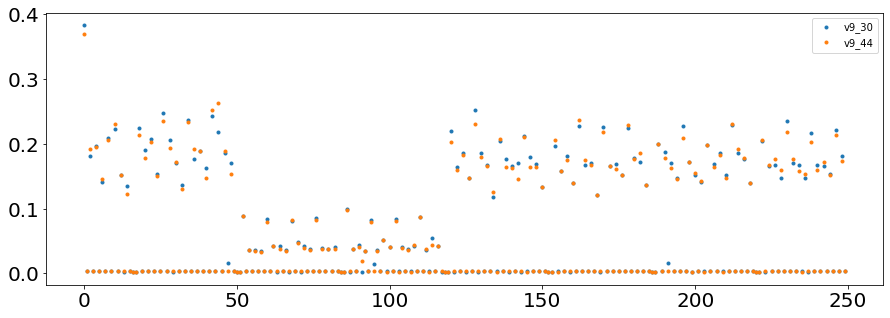

In [180]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(events):
    plt.plot(ei['Time'], ".", label=titles[i])
plt.legend()
plt.show()

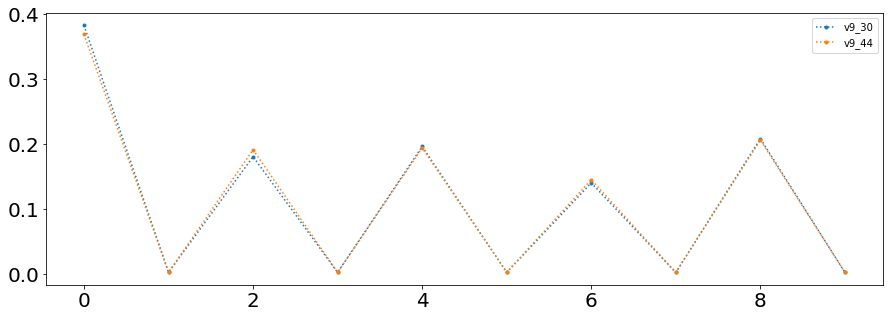

In [181]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(events):
    plt.plot(ei['Time'][:10], ".:", label=titles[i])
plt.legend()
plt.show()

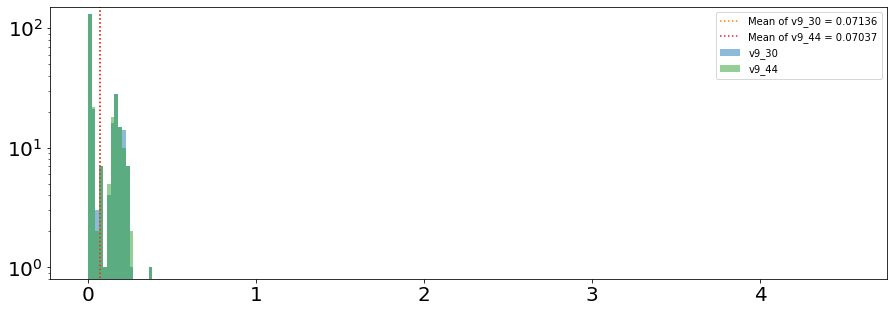

In [182]:
fig,ax = plt.subplots(figsize=(15,5))
for i, ei in enumerate(events):
    plt.hist(ei['Time'], bins=200, label=titles[i],alpha=0.5,range=(0,4.525))
    plt.plot([ei['Time'].mean(), ei['Time'].mean() ], [0.7,170], ":", label="Mean of "+str(titles[i])+" = "+str(round(ei['Time'].mean(),5) ))
plt.legend()
plt.ylim(0.8,150)
plt.yscale("log")
plt.show()

In [183]:
for i, ei in enumerate(events):
    print("Total time for all events in", titles[i],":", ei['Time'].sum(), "seconds" )
print("Saved time:", events[0]['Time'].sum() - events[1]['Time'].sum(), "seconds")

Total time for all events in v9_30 : 17.839236787 seconds
Total time for all events in v9_44 : 17.591325188 seconds
Saved time: 0.24791159900000181 seconds


---

In [184]:
modules[0].head()

,Run,SubRun,Event,Path,ModuleLabel,ModuleType,Time
0,34921,100,1,muonPath,fzInflater,FZInflater,0.083463
1,34921,100,1,muonPath,utcaUnpacker,UTCAUnpacker,0.000834
2,34921,100,1,muonPath,cccUnpacker,FC7Unpacker,0.002071
3,34921,100,1,muonPath,MuonFilter,CCCTriggerTypeFilter,0.000097
4,34921,100,1,muonPath,headerUnpacker,CaloHeaderUnpacker,0.002012


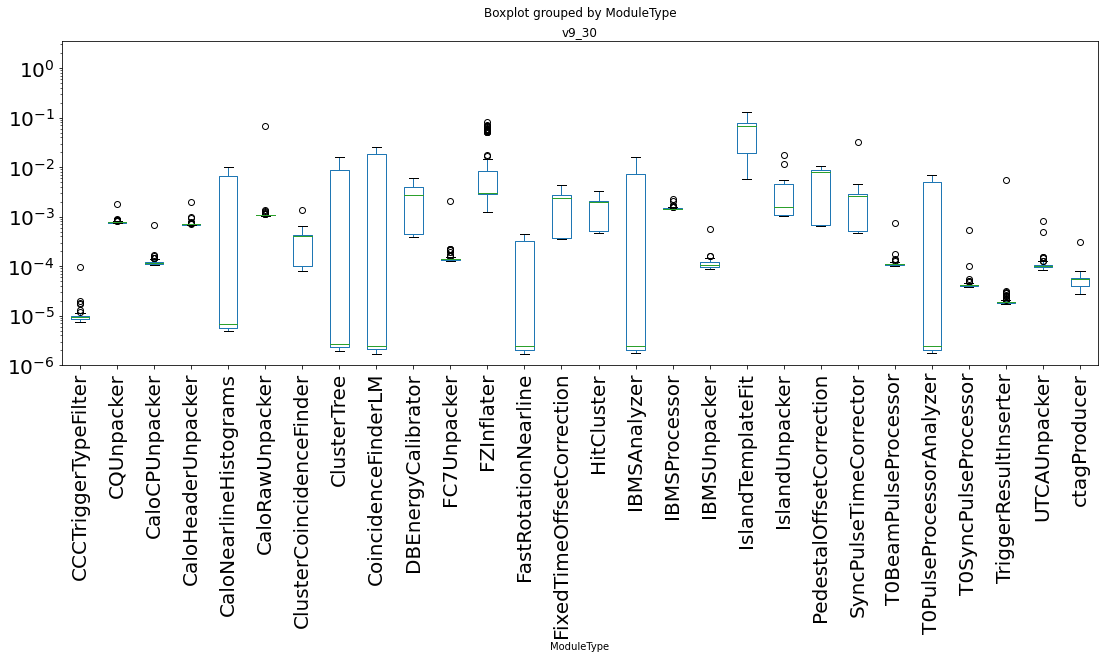

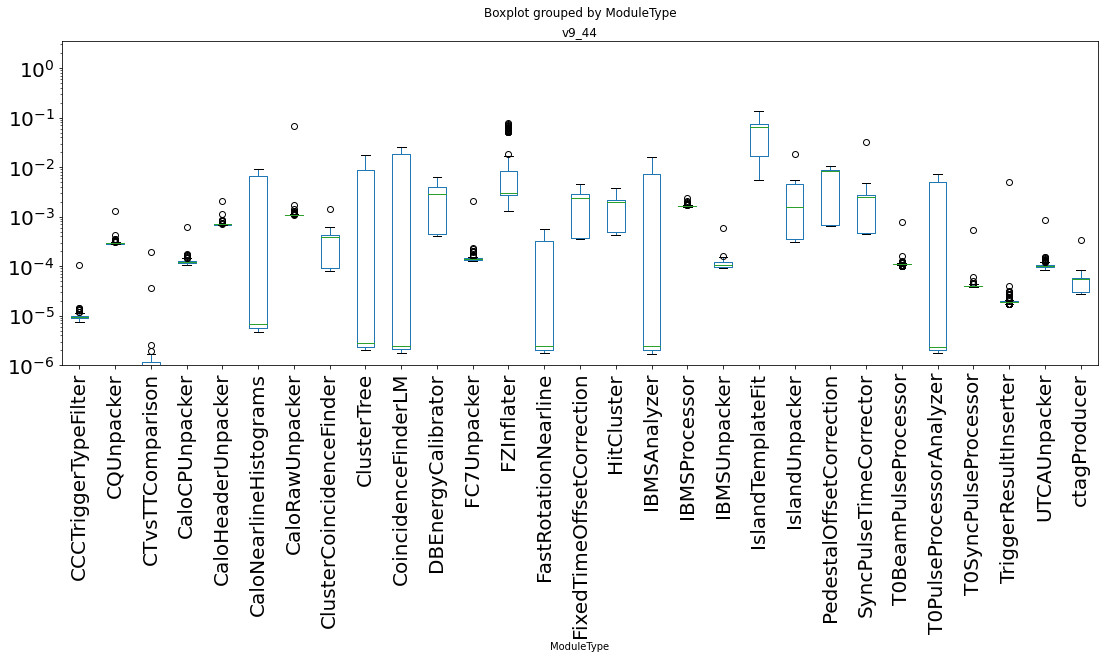

In [185]:
whichDB = 0

for whichDB in range(0,2):
    fig, ax = plt.subplots(figsize=(18,6))
    # sns.boxplot(x="ModuleType", y="Time", data=modules[whichDB])
    modules[whichDB].boxplot(column='Time', by='ModuleType', ax=ax)
    plt.title(titles[whichDB])
    plt.xticks(rotation=90)
    plt.grid()
    plt.yscale('log')
    plt.ylim(10**(-6),3.5)
    plt.show()

In [186]:
names = list(set(modules[1]['ModuleType']))
print(names)
print(len(names))

['TriggerResultInserter', 'IBMSAnalyzer', 'IslandUnpacker', 'FC7Unpacker', 'ClusterCoincidenceFinder', 'FastRotationNearline', 'DBEnergyCalibrator', 'PedestalOffsetCorrection', 'ClusterTree', 'CoincidenceFinderLM', 'IBMSUnpacker', 'CaloCPUnpacker', 'IslandTemplateFit', 'CCCTriggerTypeFilter', 'FixedTimeOffsetCorrection', 'IBMSProcessor', 'UTCAUnpacker', 'CaloNearlineHistograms', 'ctagProducer', 'SyncPulseTimeCorrector', 'T0PulseProcessorAnalyzer', 'CaloHeaderUnpacker', 'T0SyncPulseProcessor', 'HitCluster', 'CaloRawUnpacker', 'FZInflater', 'CTvsTTComparison', 'T0BeamPulseProcessor', 'CQUnpacker']
29


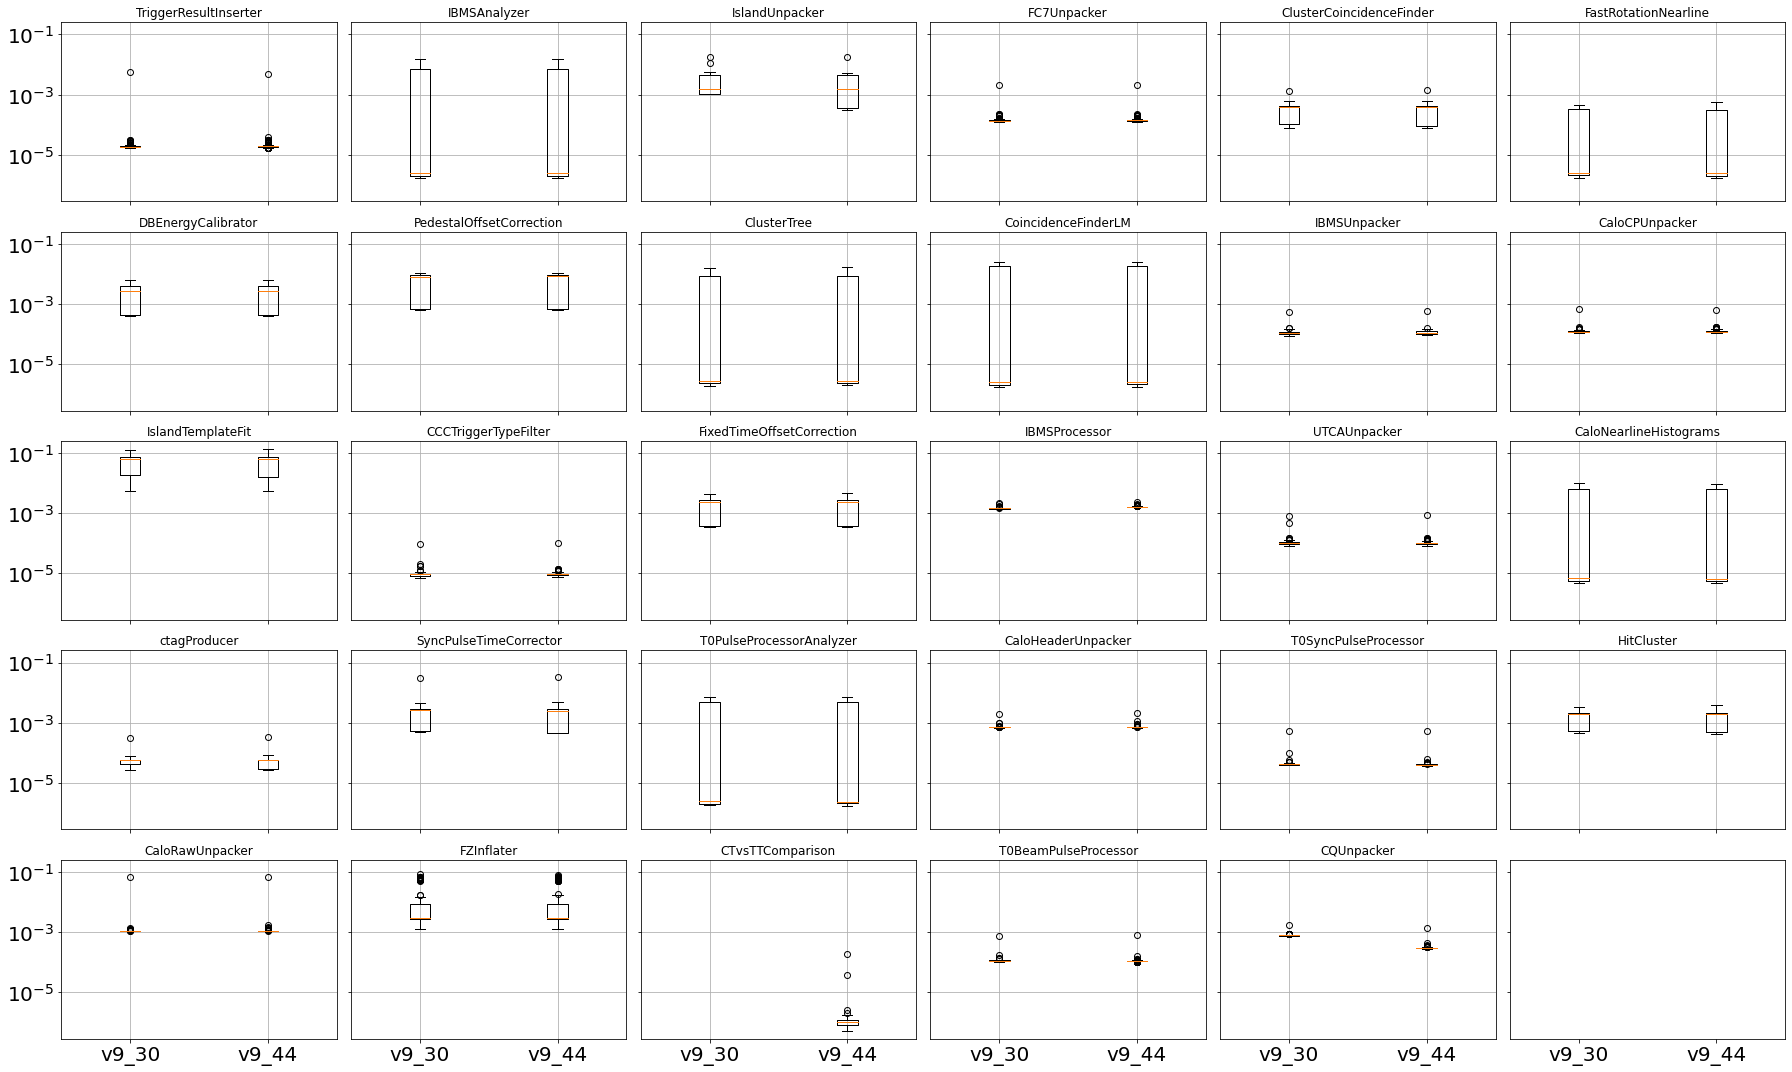

In [187]:
whichDB = 0
import matplotlib.patches as mpatches

colors = ['red', 'blue']
fig, ax = plt.subplots(5,6,figsize=(25,15),
                      sharex=True,
                      sharey=True
                      )
ax = flatten2dArray(ax)

for i,name in enumerate(names):
    plt.sca(ax[i])

    datatoplot = [ modules[whichDB].loc[modules[whichDB]['ModuleType'] == name]['Time'] for whichDB in range(2) ]
    plt.boxplot(datatoplot)
    plt.xticks([i+1 for i in range(2)], titles)
    #plt.title(titles[whichDB])
    #plt.xticks(rotation=90)
    plt.suptitle("")
    plt.title(name)
    plt.grid()
    plt.yscale('log')
    #plt.ylim(10**(-6),10)
#     red_patch = mpatches.Patch(color='red', label=titles[0])
#     blue_patch = mpatches.Patch(color='blue', label=titles[1])
#     plt.legend(handles=[red_patch, blue_patch])
    #break

plt.tight_layout()
plt.savefig("./images/ModuleTiming_All.png", bbox_inches='tight')
plt.show()

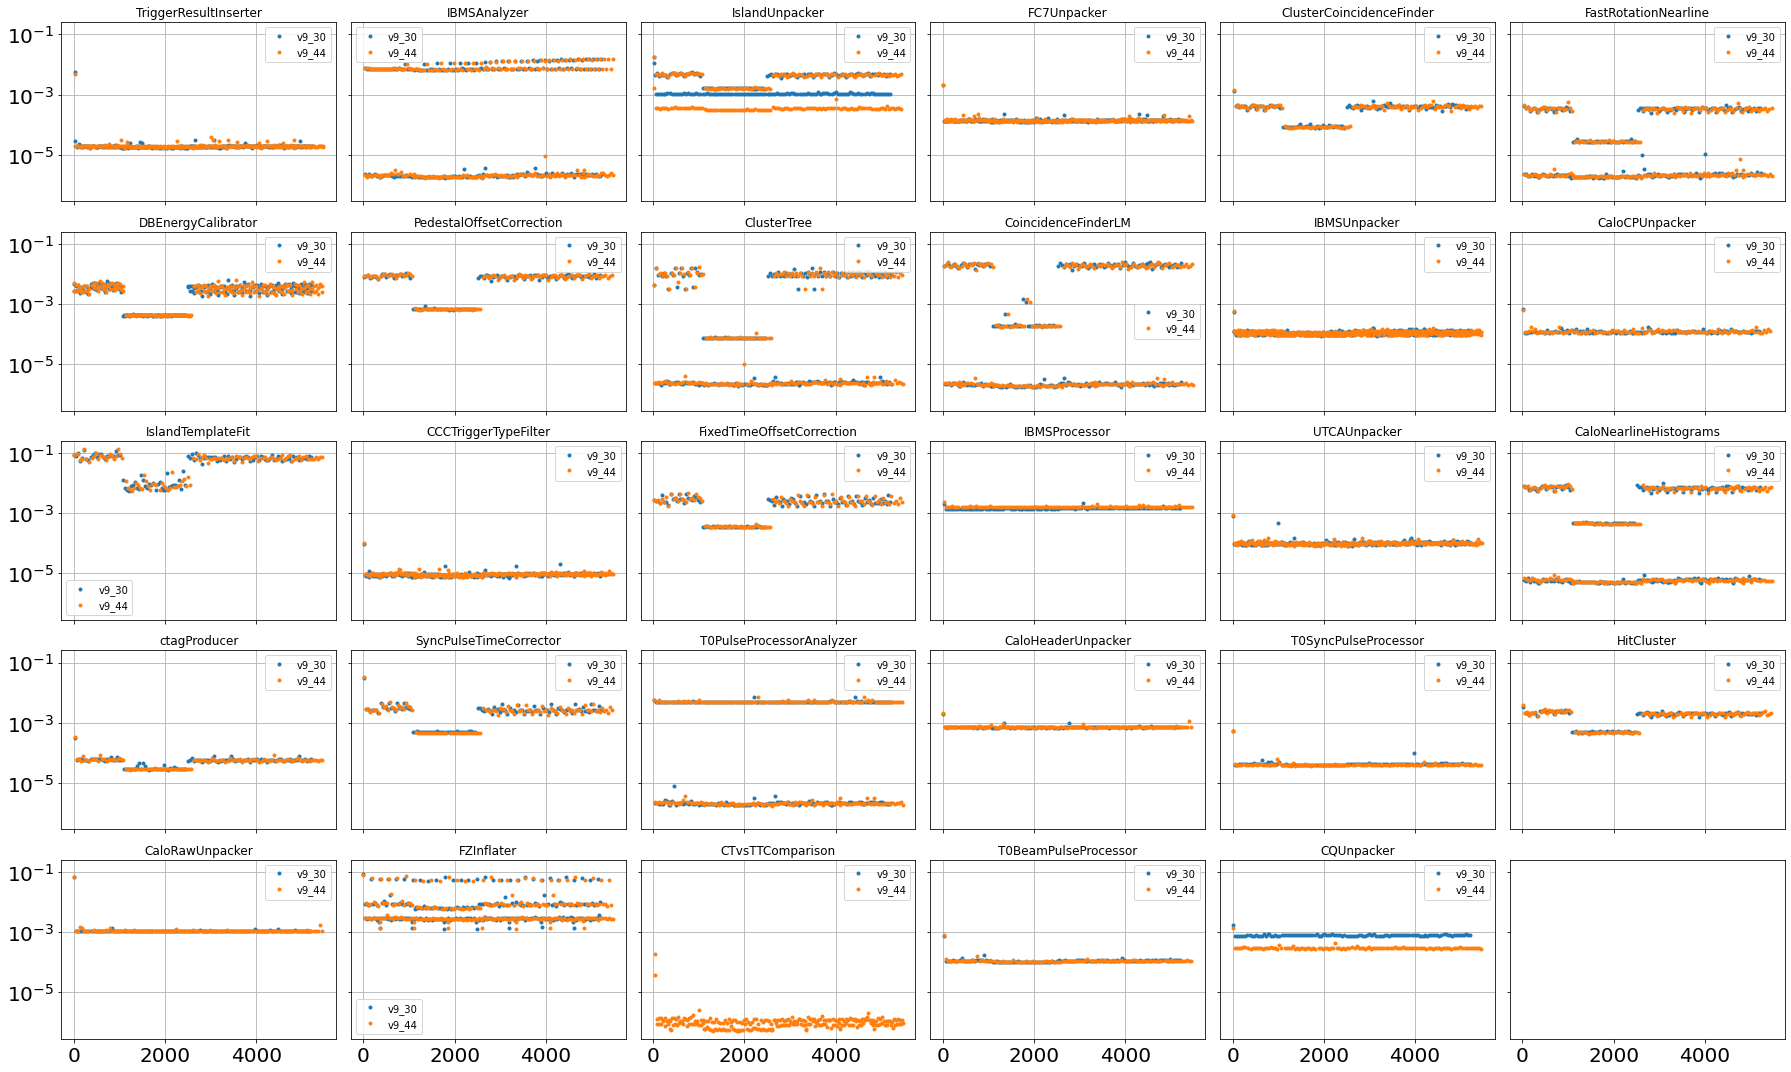

In [188]:
whichDB = 0
import matplotlib.patches as mpatches

colors = ['red', 'blue']
fig, ax = plt.subplots(5,6,figsize=(25,15), 
                       sharex=True, 
                       sharey=True
                      )
ax = flatten2dArray(ax)

for i,name in enumerate(names):
    plt.sca(ax[i])

    datatoplot = [ modules[whichDB].loc[modules[whichDB]['ModuleType'] == name]['Time'] for whichDB in range(2) ]
    for whichDB in range(2):
        plt.plot( modules[whichDB].loc[modules[whichDB]['ModuleType'] == name]['Time'], ".", label=titles[whichDB])
    #plt.title(titles[whichDB])
    #plt.xticks(rotation=90)
    plt.title(name)
    plt.grid()
    plt.yscale('log')
    #plt.ylim(10**(-6),10)
#     red_patch = mpatches.Patch(color='red', label=titles[0])
#     blue_patch = mpatches.Patch(color='blue', label=titles[1])
    plt.legend()
    #break

plt.tight_layout()
plt.savefig("./images/ModuleTiming_All_InTime.png", bbox_inches='tight')
plt.show()

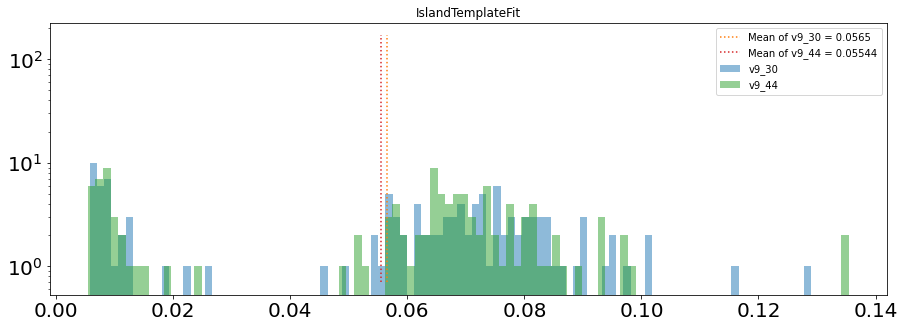

In [189]:
fig, ax = plt.subplots(figsize=(15,5))
whichModule = 'IslandTemplateFit'
#whichModule = 'FZInflater'
# whichModule = 'FixedTimeOffsetCorrection'
plt.title(whichModule)
for i, mi in enumerate(modules):
    #plt.hist( (mi.loc[mi['ModuleType'] == whichModule])['Time'], label=titles[i], alpha=0.5, bins=100, range=(0,0.5) )
    #plt.hist( (mi.loc[mi['ModuleType'] == whichModule])['Time'], label=titles[i], alpha=0.5, bins=100, range=(0,0.175) )
    plt.hist( (mi.loc[mi['ModuleType'] == whichModule])['Time'], label=titles[i], alpha=0.5, bins=100 )
    plt.plot([(mi.loc[mi['ModuleType'] == whichModule])['Time'].mean(), (mi.loc[mi['ModuleType'] == whichModule])['Time'].mean() ]
             , [0.7,170], ":", 
             label="Mean of "+str(titles[i])+" = "+str(round((mi.loc[mi['ModuleType'] == whichModule])['Time'].mean(),5) ))
plt.legend()
plt.yscale("log")
plt.show()